In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
#reading data from train.csv in dataset folder 
def read_data(file_path):    
    try:
        df = pd.read_csv(file_path)
        return df
    except FileNotFoundError:
        print(f"Error: File not found at {file_path}")
        return None
    except Exception as e:
        print(f"Error reading file: {str(e)}")
        return None

In [6]:
# Read the training data
train_data = read_data('/kaggle/input/machine-learning-dataset/train.csv')
if train_data is not None:
    print("Data loaded successfully!")

Data loaded successfully!


In [11]:
def preprocess_data():
    train_data = read_data('/kaggle/input/machine-learning-dataset/train.csv')
    if train_data is not None:
        print("Data loaded successfully!")
    # Handle categorical variables
    categorical_columns = ['Gender', 'City', 'Working Professional or Student', 
                          'Profession', 'Sleep Duration', 'Dietary Habits', 
                          'Degree', 'Have you ever had suicidal thoughts ?',
                          'Family History of Mental Illness']
    label_encoders = {}
    for column in categorical_columns:
        label_encoders[column] = LabelEncoder()
        train_data[column] = label_encoders[column].fit_transform(train_data[column].fillna('Missing'))
    numerical_columns = ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA',
                    'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours',
                    'Financial Stress']
    for column in numerical_columns:
        train_data[column] = train_data[column].fillna(train_data[column].median())
    X = train_data.drop(['id', 'Name', 'Depression'], axis=1)
    y = train_data['Depression']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    return X_train, X_test, y_train, y_test


In [ ]:
#use svm to be trained on these data
# Import necessary libraries

# Split the data
X_train, X_test, y_train, y_test = preprocess_data()

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM model
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = svm_model.predict(X_test_scaled)

# Print model performance
print("\nModel Performance:")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Model Performance:

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     22986
           1       0.85      0.79      0.82      5154

    accuracy                           0.94     28140
   macro avg       0.90      0.88      0.89     28140
weighted avg       0.93      0.94      0.94     28140



In [12]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import time


# Split the data
X_train, X_test, y_train, y_test = preprocess_data()

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# List of kernels to try
kernels = ['linear', 'rbf', 'poly', 'sigmoid']

# Dictionary to store results
results = {}

for kernel in kernels:
    # Create and train model
    print(f"\nTraining SVM with {kernel} kernel...")
    start_time = time.time()
    
    svm_model = SVC(
        kernel=kernel,
        random_state=42,
        probability=True  # Enable probability estimates
    )
    
    # Fit model
    svm_model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = svm_model.predict(X_test_scaled)
    
    # Calculate training time
    training_time = time.time() - start_time
    
    # Store results
    results[kernel] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'training_time': training_time,
        'report': classification_report(y_test, y_pred)
    }
    
    print(f"\nResults for {kernel} kernel:")
    print(f"Accuracy: {results[kernel]['accuracy']:.4f}")
    print(f"Training time: {results[kernel]['training_time']:.2f} seconds")
    print("\nClassification Report:")
    print(results[kernel]['report'])

Data loaded successfully!

Training SVM with linear kernel...

Results for linear kernel:
Accuracy: 0.9362
Training time: 722.01 seconds

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     22986
           1       0.84      0.81      0.82      5154

    accuracy                           0.94     28140
   macro avg       0.90      0.89      0.89     28140
weighted avg       0.94      0.94      0.94     28140


Training SVM with rbf kernel...

Results for rbf kernel:
Accuracy: 0.9360
Training time: 693.46 seconds

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     22986
           1       0.85      0.79      0.82      5154

    accuracy                           0.94     28140
   macro avg       0.90      0.88      0.89     28140
weighted avg       0.93      0.94      0.94     28140


Training SVM with poly kernel...

Results for poly kern


Random Forest Model Performance:

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.92      0.95     22986
           1       0.72      0.92      0.81      5154

    accuracy                           0.92     28140
   macro avg       0.85      0.92      0.88     28140
weighted avg       0.93      0.92      0.92     28140



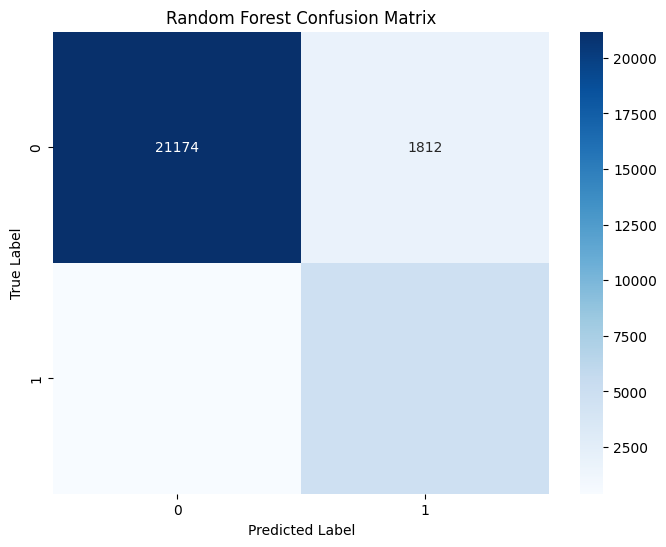

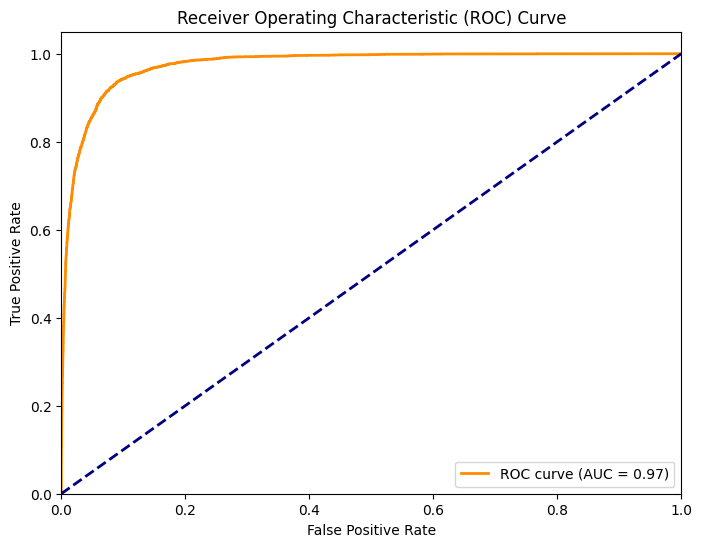

e:\SSD\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\SSD\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\SSD\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


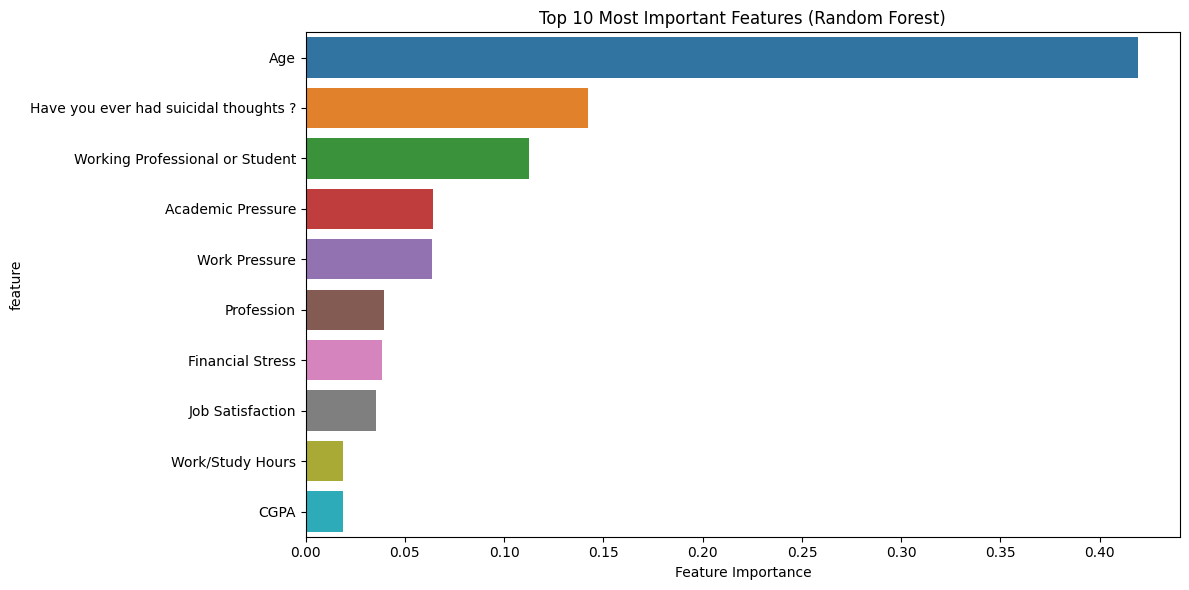


Top 10 Most Important Features:
                                  feature  importance
1                                     Age    0.419450
13  Have you ever had suicidal thoughts ?    0.142318
3         Working Professional or Student    0.112549
5                       Academic Pressure    0.064129
6                           Work Pressure    0.063683
4                              Profession    0.039238
15                       Financial Stress    0.038215
9                        Job Satisfaction    0.035516
14                       Work/Study Hours    0.019054
7                                    CGPA    0.018718


In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt


X_train, X_test, y_train, y_test = preprocess_data()

# Create and train the Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=1000,    # Number of trees in the forest
    max_depth=10,        # Maximum depth of each tree
    min_samples_split=5, # Minimum samples required to split a node
    min_samples_leaf=2,  # Minimum samples required at each leaf node
    random_state=42,
    class_weight='balanced' # Handle class imbalance
)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Print model performance
print("\nRandom Forest Model Performance:")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Feature importance analysis
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.title('Top 10 Most Important Features (Random Forest)')
plt.xlabel('Feature Importance')
plt.tight_layout()
plt.show()

# Print detailed feature importance
print("\nTop 10 Most Important Features:")
print(feature_importance.head(10).to_string())

In [ ]:
from sklearn.model_selection import GridSearchCV
# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
# Create Random Forest model
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
# Perform grid search
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1
)
# Fit grid search
grid_search.fit(X_train, y_train)
# Get best parameters
print("Best parameters:", grid_search.best_params_)


Logistic Regression Model Performance:

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.91      0.95     22986
           1       0.70      0.93      0.80      5154

    accuracy                           0.91     28140
   macro avg       0.84      0.92      0.87     28140
weighted avg       0.93      0.91      0.92     28140



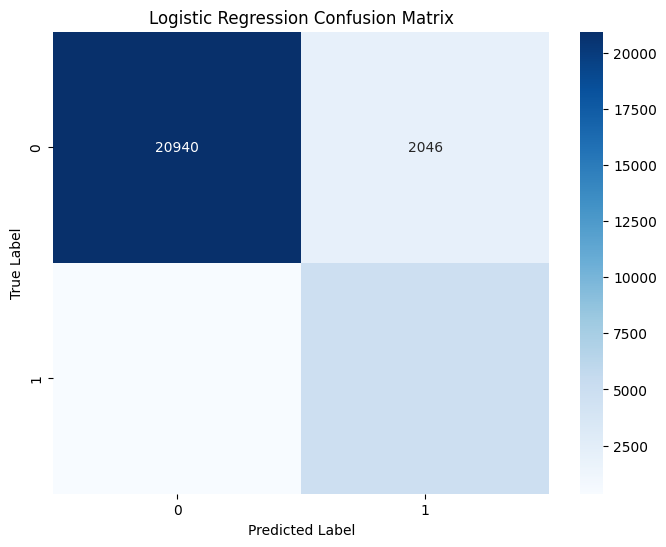

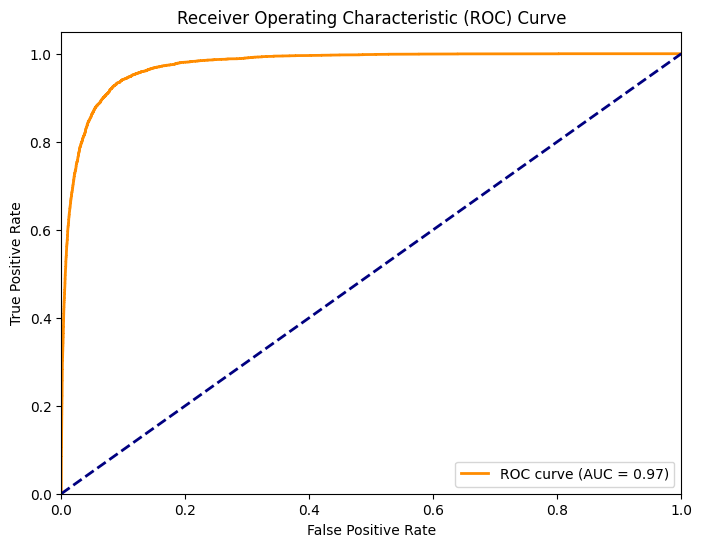

e:\SSD\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\SSD\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\SSD\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


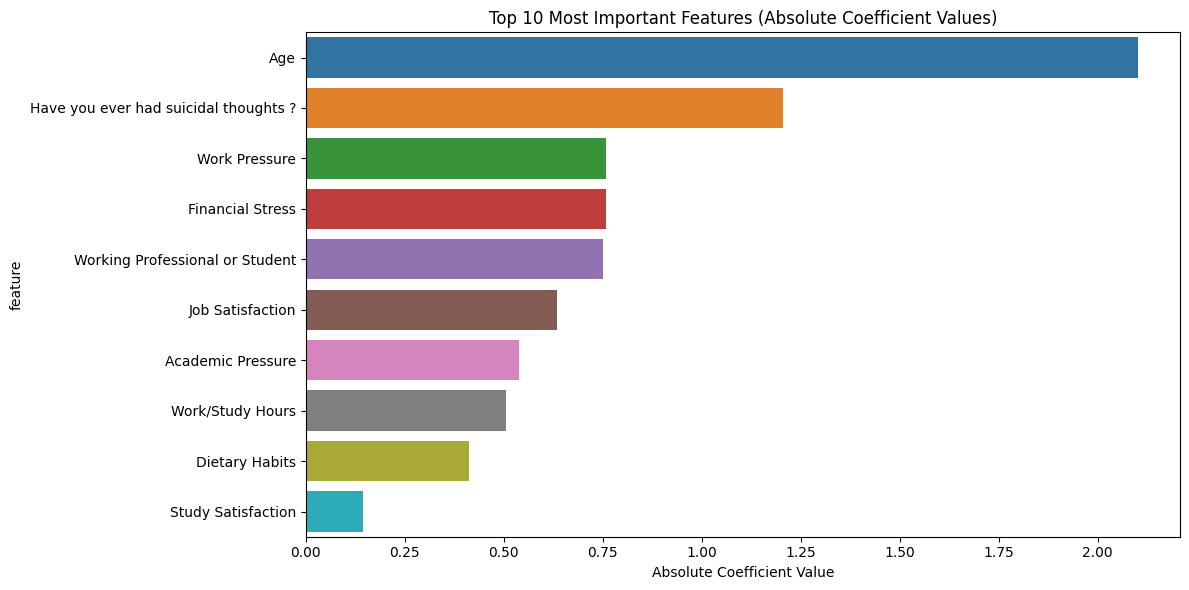


Top 10 Features by Odds Ratio:
                                  feature  odds_ratio  coefficient
13  Have you ever had suicidal thoughts ?    3.340060     1.205989
6                           Work Pressure    2.135500     0.758701
15                       Financial Stress    2.134234     0.758108
5                       Academic Pressure    1.712560     0.537989
14                       Work/Study Hours    1.660622     0.507192
11                         Dietary Habits    1.509068     0.411492
16       Family History of Mental Illness    1.121201     0.114401
7                                    CGPA    1.050234     0.049013
12                                 Degree    1.048703     0.047554
10                         Sleep Duration    1.034637     0.034051


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt


# Split the data
X_train, X_test, y_train, y_test = preprocess_data()

# Scale the features (important for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the Logistic Regression model
lr_model = LogisticRegression(
    max_iter=1000,      
    random_state=42,
    class_weight='balanced'  
)
lr_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = lr_model.predict(X_test_scaled)
y_pred_proba = lr_model.predict_proba(X_test_scaled)[:, 1]

# Print model performance
print("\nLogistic Regression Model Performance:")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Feature importance analysis
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'coefficient': np.abs(lr_model.coef_[0])
})
feature_importance = feature_importance.sort_values('coefficient', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='coefficient', y='feature', data=feature_importance.head(10))
plt.title('Top 10 Most Important Features (Absolute Coefficient Values)')
plt.xlabel('Absolute Coefficient Value')
plt.tight_layout()
plt.show()

# Print odds ratios for interpretability
odds_ratios = pd.DataFrame({
    'feature': X.columns,
    'odds_ratio': np.exp(lr_model.coef_[0]),
    'coefficient': lr_model.coef_[0]
})
odds_ratios = odds_ratios.sort_values('odds_ratio', ascending=False)

print("\nTop 10 Features by Odds Ratio:")
print(odds_ratios.head(10).to_string())